In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
#======================================================[Preprocessing]----
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder,MinMaxScaler
from sklearn import preprocessing
#======================================================[MODELS]-----
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
#====================================================[Evaluation]
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_curve

import warnings
warnings.filterwarnings("ignore")

**[customerID]**

**[gender]**:  Whether the customer is a male or a female

**[SeniorCitizen]**:  Whether the customer is a senior citizen or not (1, 0)

**[Partner]**:  Whether the customer has a partner or not (Yes, No)

**[Dependents]**:  Whether the customer has dependents or not (Yes, No)

**[tenure]**:  Number of months the customer has stayed with the company

**[PhoneService]**:  Whether the customer has a phone service or not (Yes, No)

**[MultipleLine]**:  Whether the customer has multiple lines or not (Yes, No,No phone service)

**[InternetService]**:  Customer's internet service provider (DSL, Fiber optic, No)

**[OnlineSecurity]:** Whether the customer has online security or not (Yes, No, No internet service)

**[OnlineBackup]**:  Whether the customer has online Backup or not (Yes, No, No internet service)

**[DeviceProtection]**:

**[TechSupport]**:

**[StreamingTV]**:

**[StreamingMovies]**:

**[Contract]**:

**[PaperlessBilling]**:

**[PaymentMethod]**:

**[MonthlyCharges]**:

**[TotalCharges]**:

**[Churn]**:

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
df.shape

(7043, 21)

In [ ]:
df['tenure X MonthlyCharges']=df['tenure']*df['MonthlyCharges']

In [ ]:
df[['tenure','MonthlyCharges','tenure X MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,tenure X MonthlyCharges,TotalCharges
0,1,29.85,29.85,29.85
1,34,56.95,1936.30,1889.5
2,2,53.85,107.70,108.15
3,45,42.30,1903.50,1840.75
4,2,70.70,141.40,151.65
...,...,...,...,...
7038,24,84.80,2035.20,1990.5
7039,72,103.20,7430.40,7362.9
7040,11,29.60,325.60,346.45
7041,4,74.40,297.60,306.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7043 non-null   object 
 1   gender                   7043 non-null   object 
 2   SeniorCitizen            7043 non-null   int64  
 3   Partner                  7043 non-null   object 
 4   Dependents               7043 non-null   object 
 5   tenure                   7043 non-null   int64  
 6   PhoneService             7043 non-null   object 
 7   MultipleLines            7043 non-null   object 
 8   InternetService          7043 non-null   object 
 9   OnlineSecurity           7043 non-null   object 
 10  OnlineBackup             7043 non-null   object 
 11  DeviceProtection         7043 non-null   object 
 12  TechSupport              7043 non-null   object 
 13  StreamingTV              7043 non-null   object 
 14  StreamingMovies         

In [ ]:
df.drop('customerID', axis=1, inplace=True )

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
tenure X MonthlyCharges,7043.0,2279.581350,2264.729447,0.00,394.0,1393.60,3786.10,8550.00


In [ ]:
Name=[]
Data_Type=[]
Null_Values=[]
Num_of_unique=[]
Unique_Values=[]

def info_col(col):
    Name.append(col.name)
    Data_Type.append(col.dtype)
    Null_Values.append(col.isnull().sum())
    Num_of_unique.append(col.nunique())
    if col.nunique() < 10:
        Unique_Values.append(col.unique())
    else:
        Unique_Values.append('More than 10')


In [ ]:
for col in df.columns :
  info_col(df[col])
print(pd.DataFrame({'Name':Name, 'Data_Type':Data_Type,'Null_Values':Null_Values,'Num_of_unique':Num_of_unique, 'Unique_Values':Unique_Values}))

                       Name Data_Type  Null_Values  Num_of_unique  \
0                    gender    object            0              2   
1             SeniorCitizen     int64            0              2   
2                   Partner    object            0              2   
3                Dependents    object            0              2   
4                    tenure     int64            0             73   
5              PhoneService    object            0              2   
6             MultipleLines    object            0              3   
7           InternetService    object            0              3   
8            OnlineSecurity    object            0              3   
9              OnlineBackup    object            0              3   
10         DeviceProtection    object            0              3   
11              TechSupport    object            0              3   
12              StreamingTV    object            0              3   
13          StreamingMovies    obj

In [ ]:
df.TotalCharges.value_counts().sort_index()

,count
TotalCharges,
,11
100.2,1
100.25,1
100.35,1
100.4,1
...,...
997.75,1
998.1,1
999.45,1


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
Zero_tenure=df[df['tenure']==0]
Null_TotalCharges=df[df['TotalCharges'].isna()]
print(Zero_tenure.shape)
print(Null_TotalCharges.shape)
# you will notice  [that Zero_tenure] & [Null_TotalCharge] are in same rows

(11, 21)
(11, 21)


In [ ]:
Null_TotalCharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure X MonthlyCharges
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0.0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0.0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0.0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0.0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0.0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0.0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0.0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0.0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0.0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0.0


In [ ]:
df.dropna(subset=['TotalCharges'],inplace=True)

In [ ]:
df.TotalCharges.value_counts()

,count
TotalCharges,
20.20,11
19.75,9
20.05,8
19.90,8
19.65,8
...,...
6849.40,1
692.35,1
130.15,1


In [ ]:
df.duplicated().sum()

22

In [ ]:
cols=df.columns
cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure X MonthlyCharges'],
      dtype='object')

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.reset_index(inplace=True)
df.drop('index',axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure X MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40


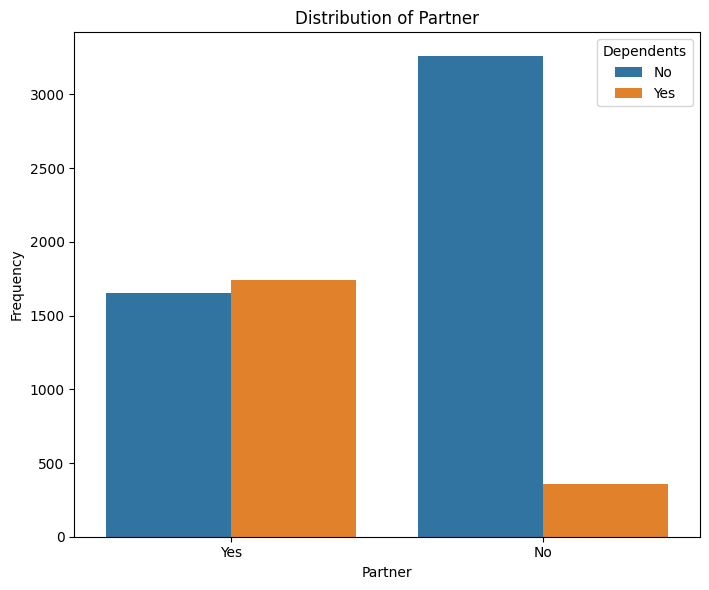

In [ ]:
num_col=['Partner',]

plt.figure(figsize=(20, 6))
for i,col in enumerate(num_col,1):
    plt.subplot(1,3,i)
    sns.countplot(data=df, x=df[col], hue='Dependents')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


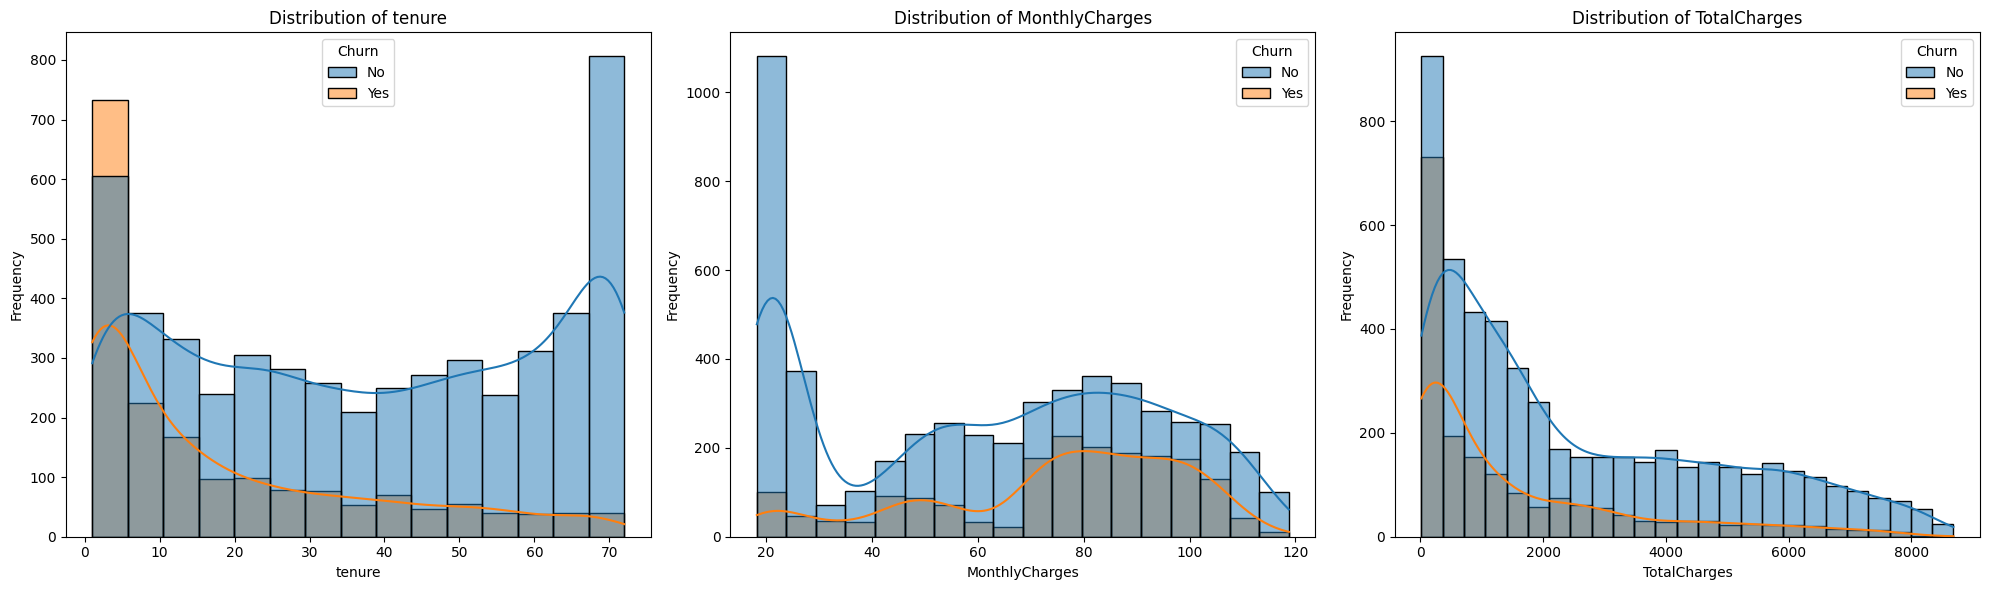

In [ ]:
num_col=['tenure','MonthlyCharges','TotalCharges']

plt.figure(figsize=(20, 6))
for i,col in enumerate(num_col,1):
    plt.subplot(1,3,i)
    sns.histplot(data=df, x=df[col], kde=True, hue='Churn')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#كل ما عدد الشهور بيزيد نسبة الل بيمشو بتقل
#اكبر فئة بتدفع فالشهر من 20 ل30 وفنفس الوقت الفئة الاكتر ولاء  ,والفئة ما بين 70 ل100 اكبر نسة بتمشي
#كل مكان مجموع الدفع على مدار الشهور اقل بتزيد نسبة انهم يمشو

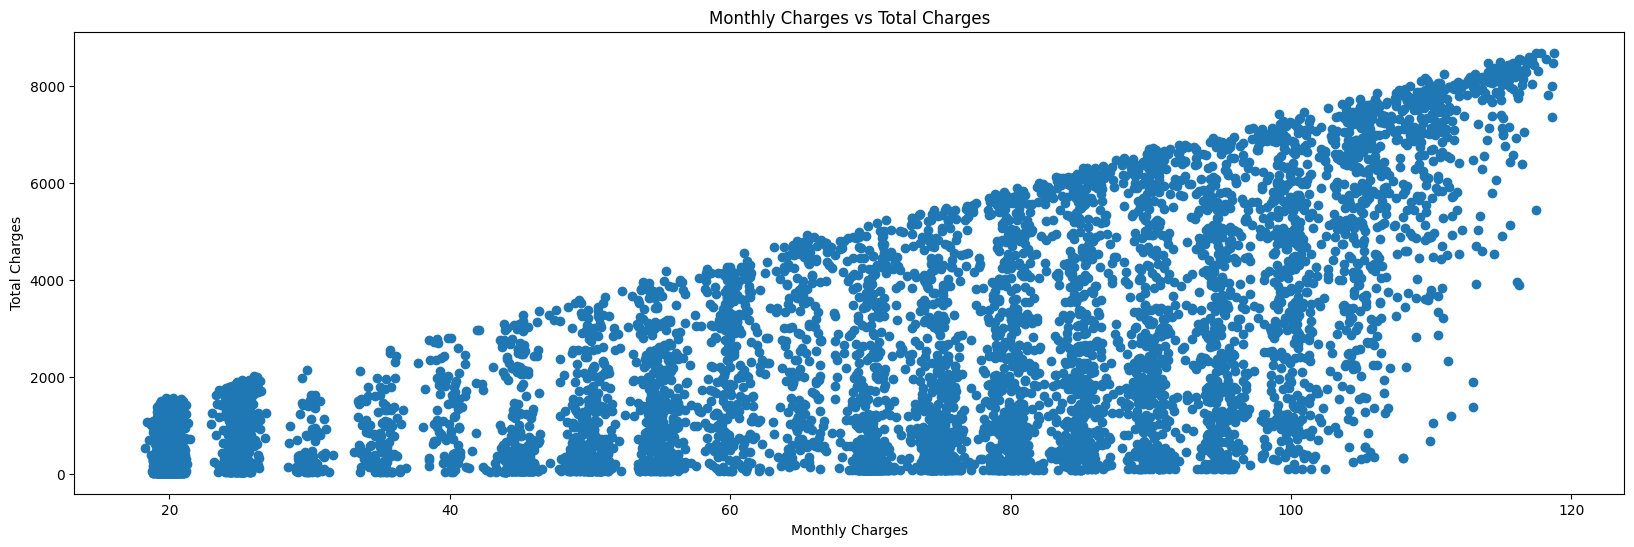

In [ ]:
plt.figure(figsize=(20, 6)) #draw
plt.scatter(df['MonthlyCharges'], df['TotalCharges'])
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

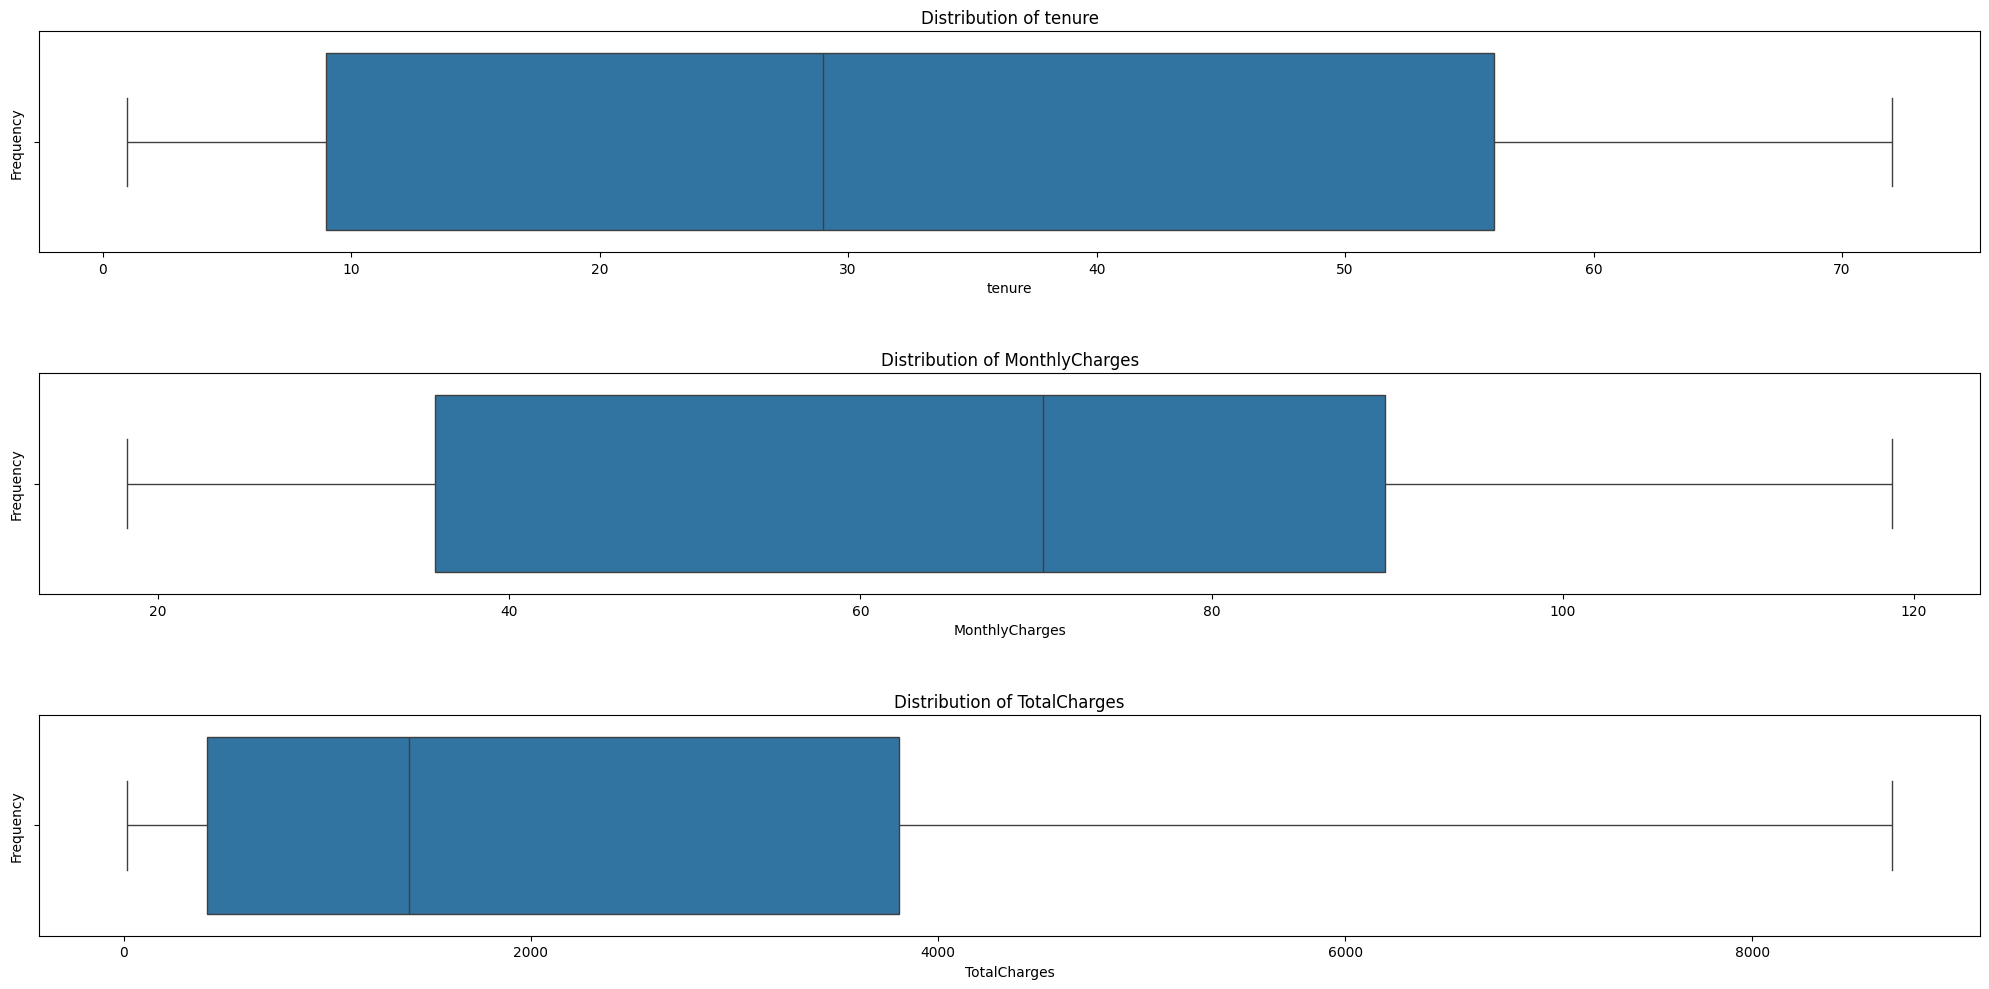

In [ ]:
plt.figure(figsize=(20, 10)) #draw
for i,col in enumerate(num_col,1):
    plt.subplot(3,1,i)
    sns.boxplot(x=df[col],)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout(h_pad=4)
plt.show()

In [ ]:
cat_col=df.select_dtypes('object').columns
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

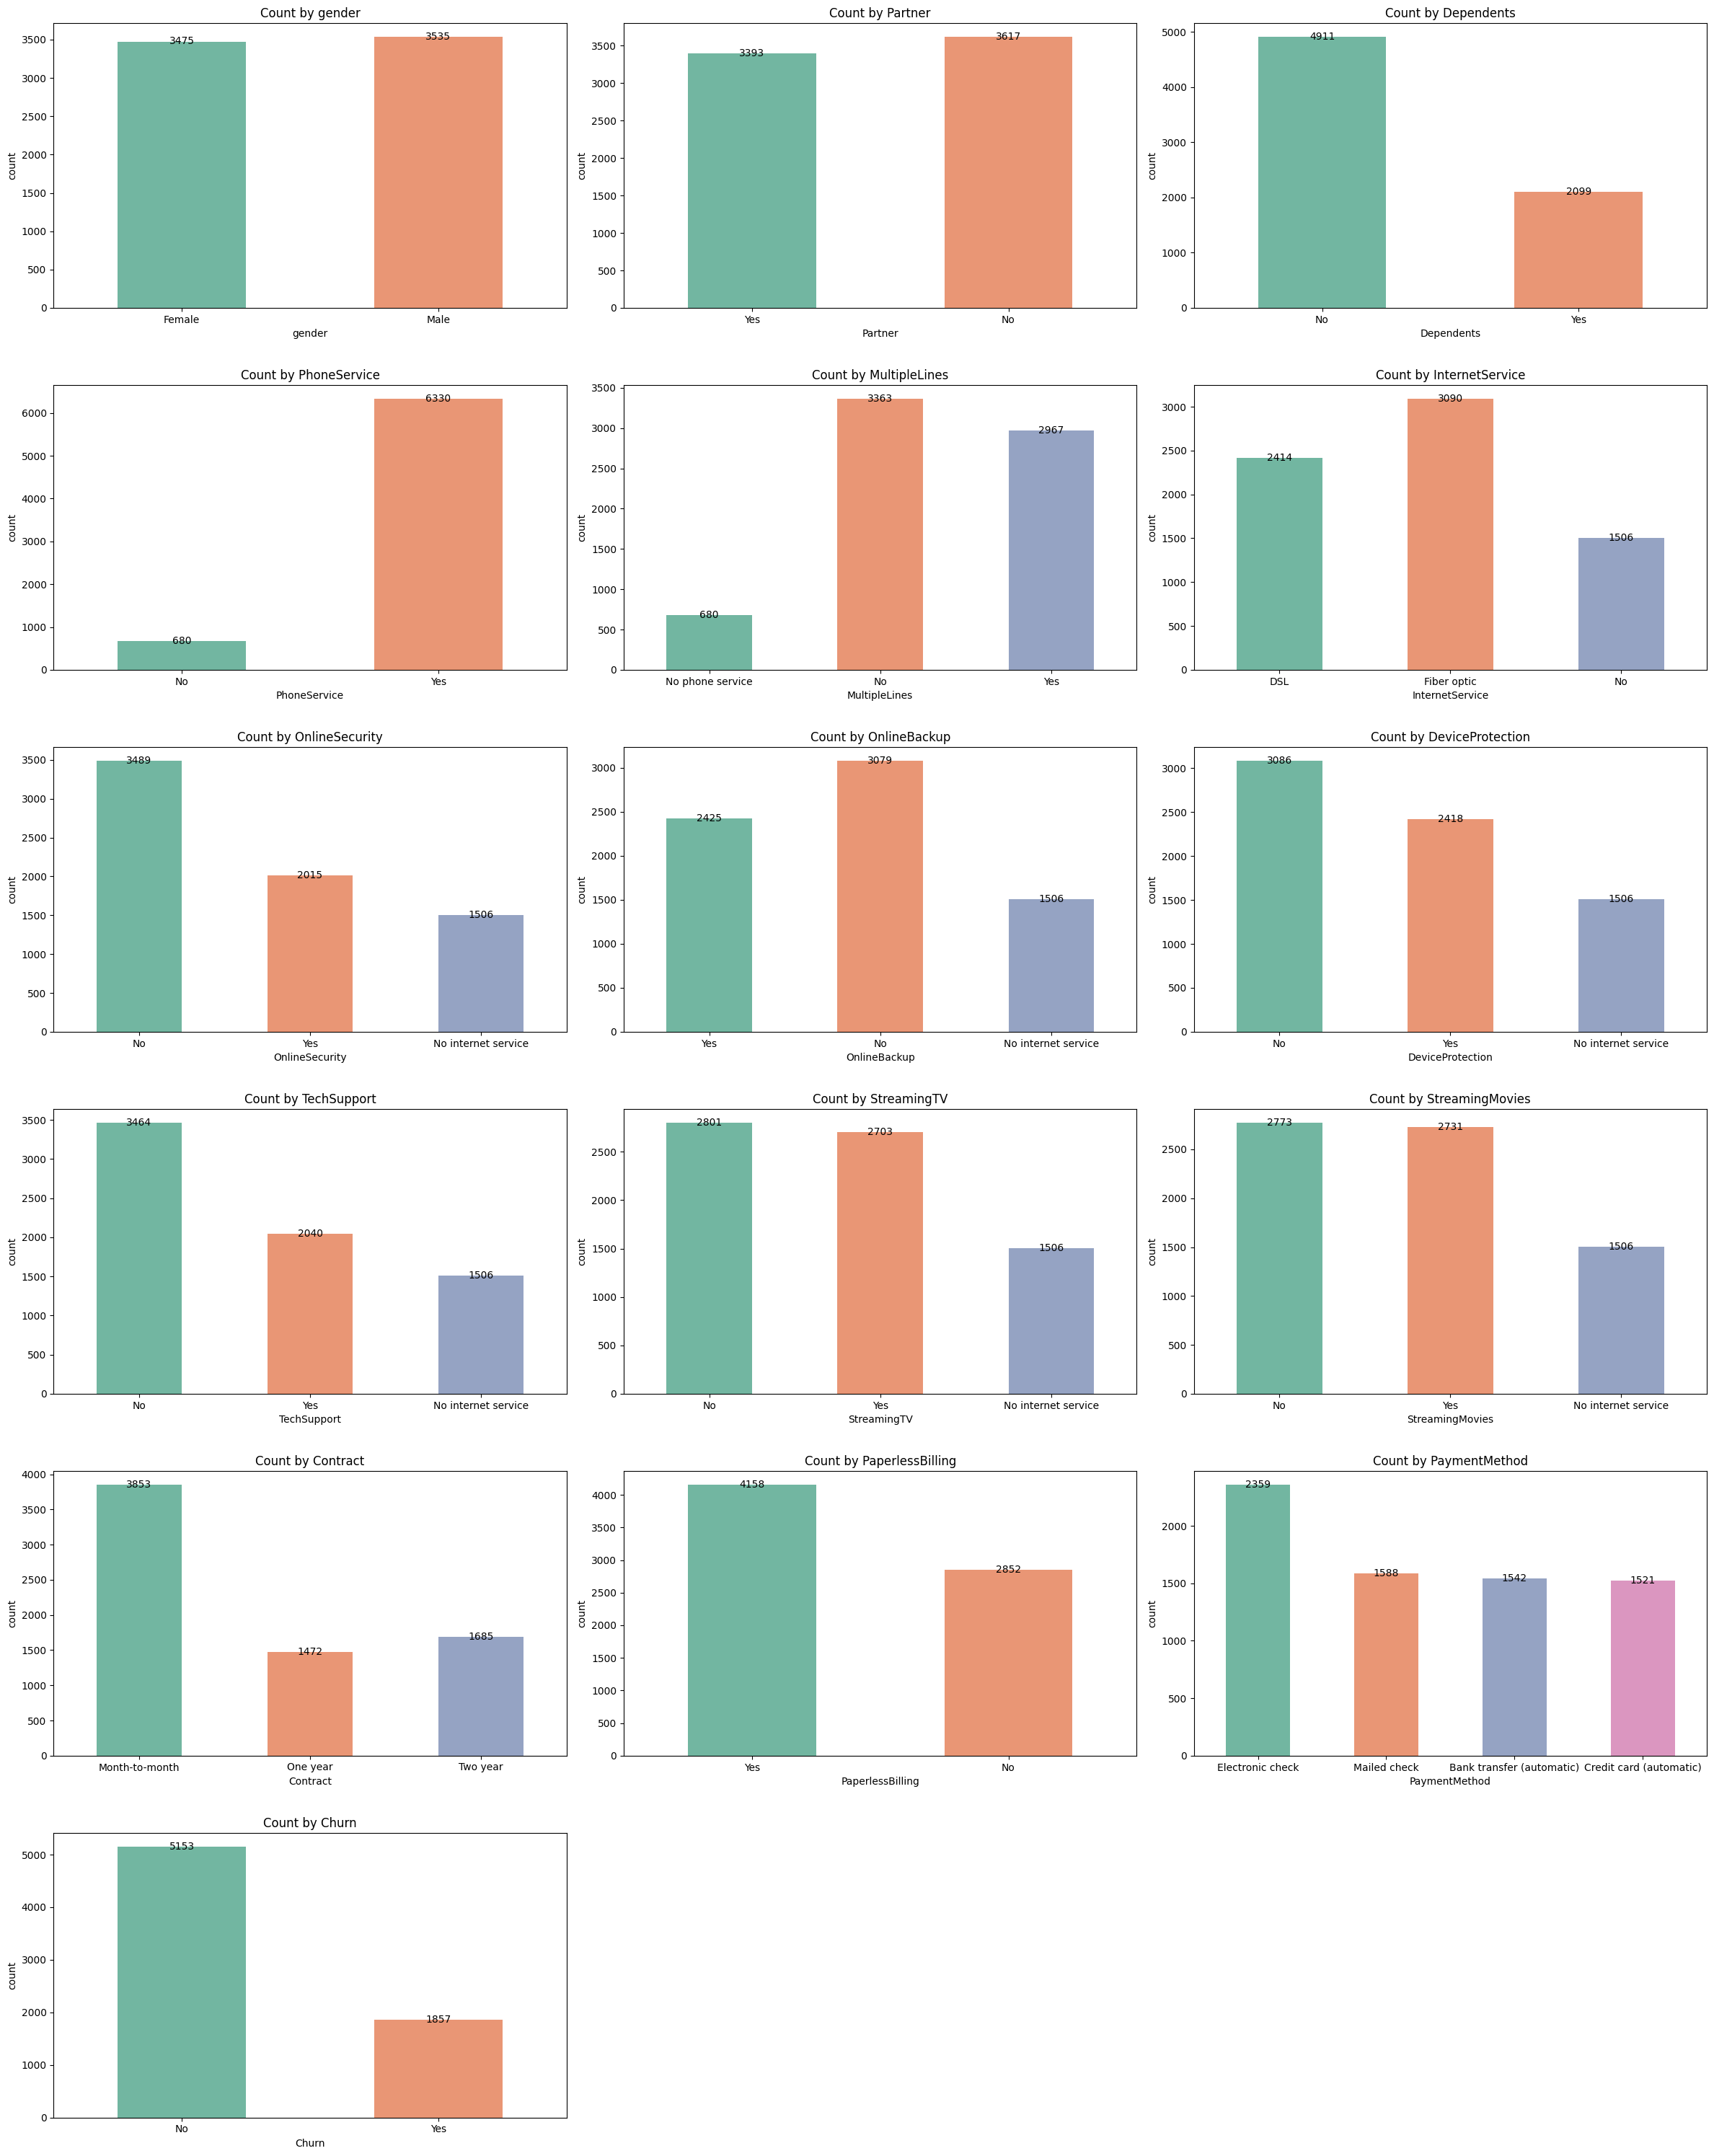

In [ ]:
plt.figure(figsize=(24,30)) #draw
for i,col in enumerate(cat_col,1):
    plt.subplot(6,3,i)

    sns.countplot(data = df ,x = col, palette='Set2',width=0.5,)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Count by {col}')
plt.tight_layout(h_pad=3)
plt.show()

In [ ]:
#df.drop('tenure_group',axis=1,inplace=True)
bins = [0, 12, 24, 36, 48, 60, df['tenure'].max()]
labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years','4-5 Years', '>5 Years']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

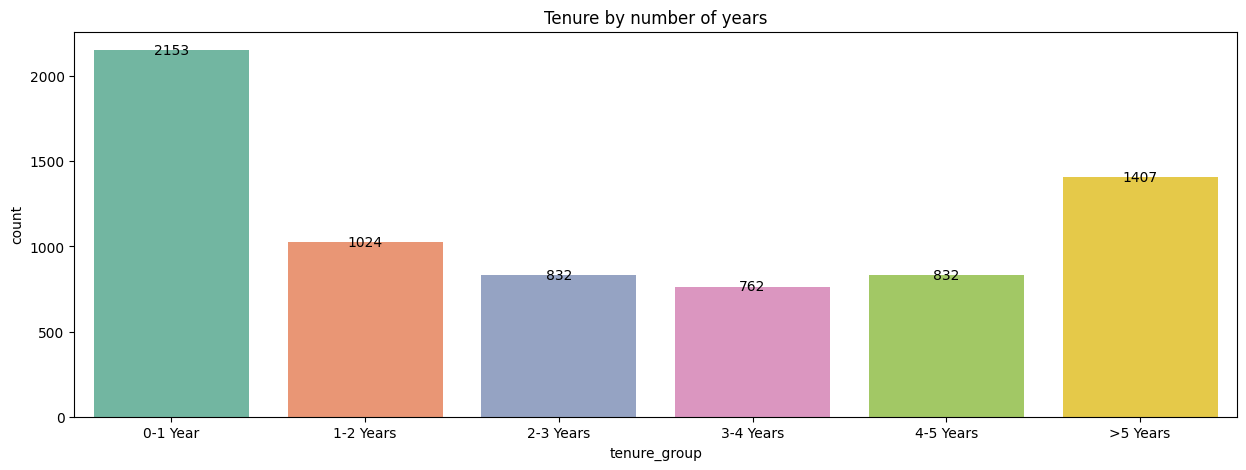

In [ ]:
plt.figure(figsize=(15,5)) #draw
sns.countplot(x=df.tenure_group,data=df,palette='Set2')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

plt.title('Tenure by number of years')
plt.show()

In [ ]:
cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure X MonthlyCharges'],
      dtype='object')

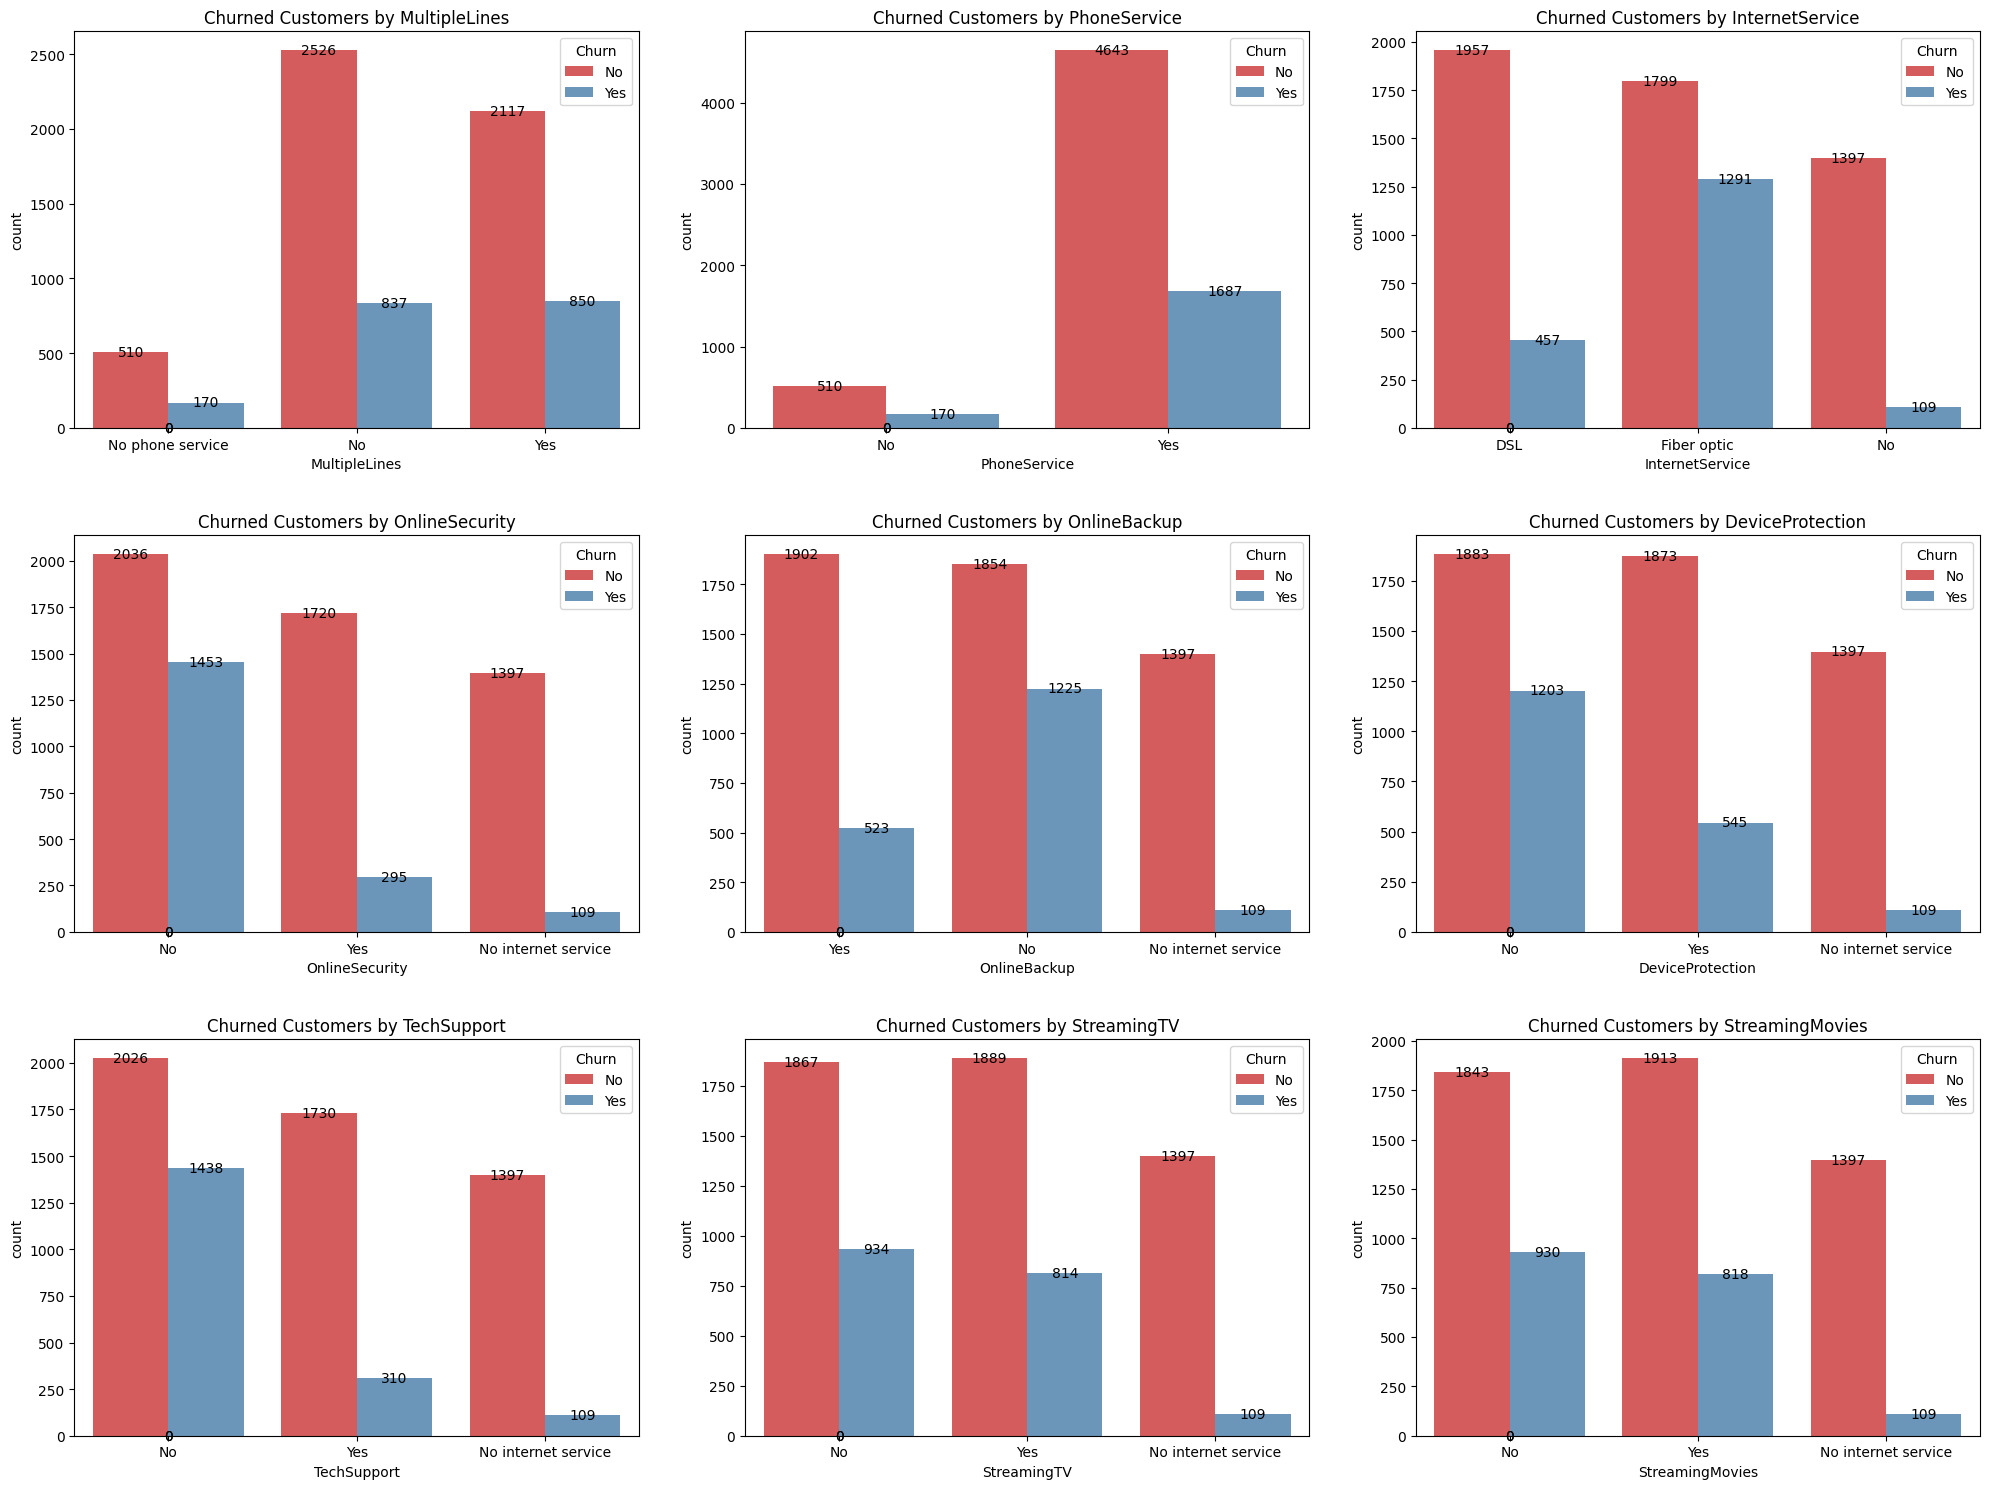

In [ ]:
col_service=['MultipleLines', 'PhoneService', 'InternetService', 'OnlineSecurity', #draw
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

plt.figure(figsize=(20,15))
for i,col in enumerate(col_service,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df ,x = col, hue = 'Churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=3,w_pad=3)

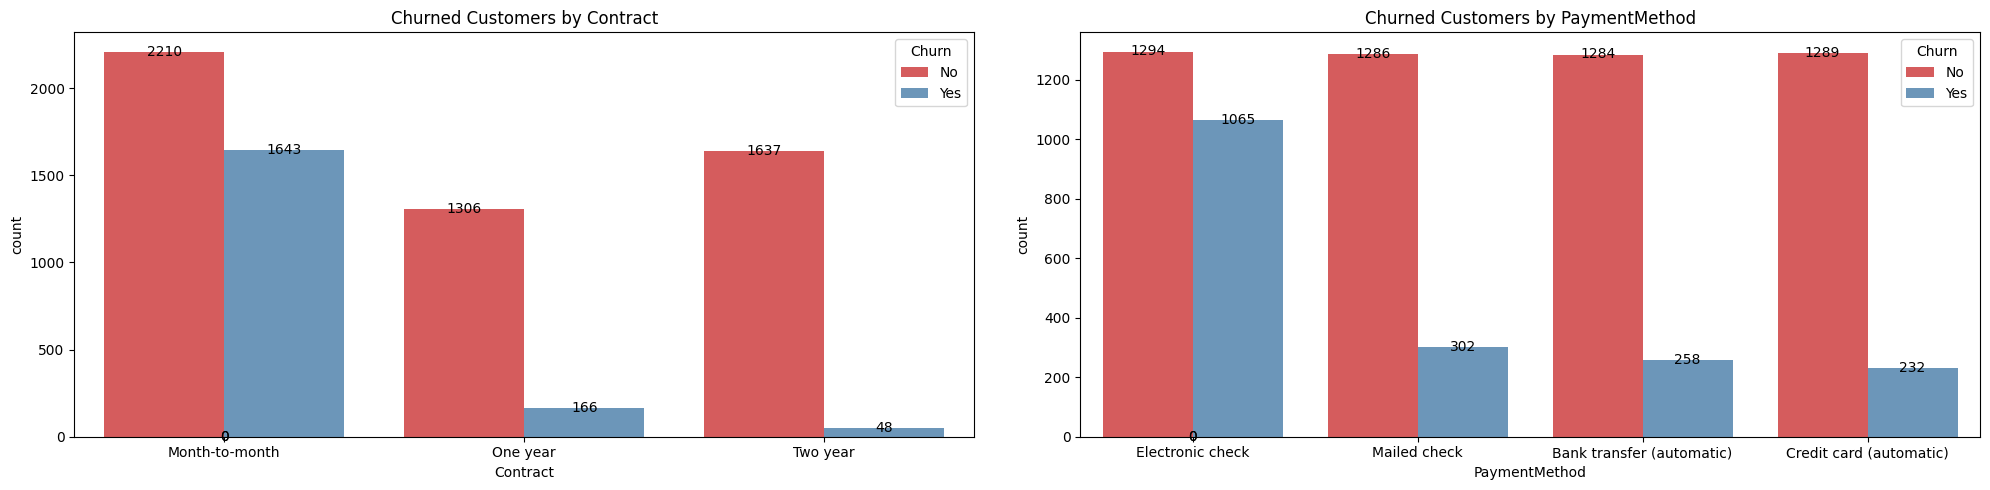

In [ ]:
plt.figure(figsize=(20,5)) #draw
for i,col in enumerate(['Contract','PaymentMethod'],1):
    plt.subplot(1,2,i)
    sns.countplot(data = df ,x = col, hue = 'Churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=5,w_pad=3)

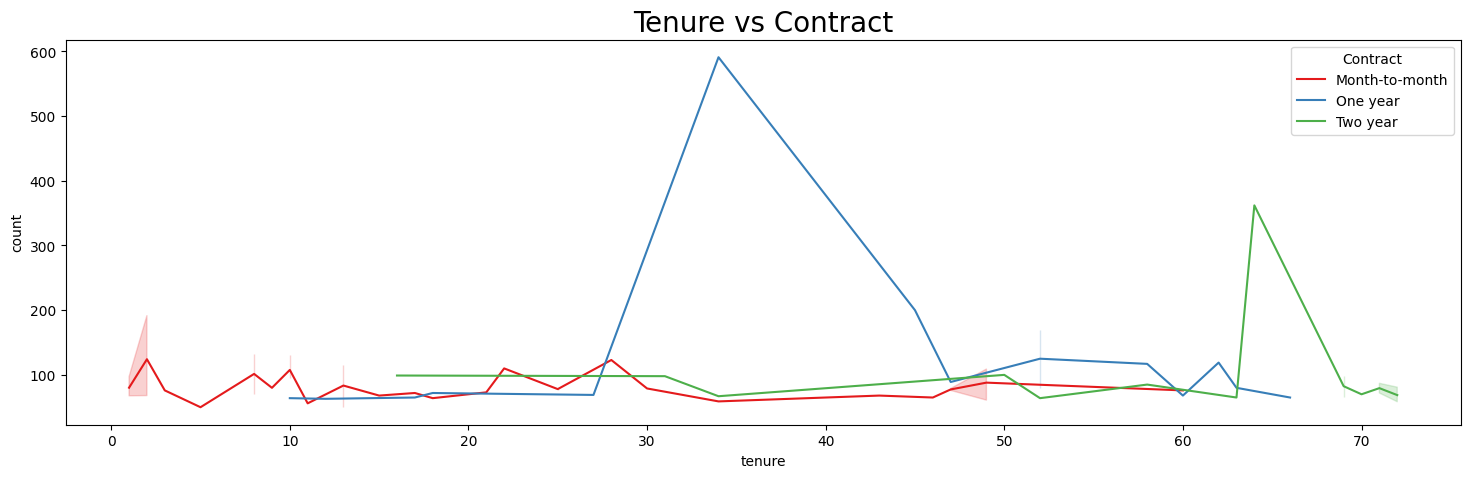

In [ ]:
plt .figure(figsize=(18,5)) #draw
sns.lineplot(data = df ,x = 'tenure',y=df['tenure'].value_counts(), hue = 'Contract', palette='Set1')
plt.title('Tenure vs Contract',size=20)
plt.show()

In [ ]:
dd=df.groupby(['tenure','Contract'])['Contract'].count()
dd

tenure  Contract      
1       Month-to-month    582
        One year            7
        Two year            2
2       Month-to-month    230
        One year            7
                         ... 
71      One year           28
        Two year          137
72      Month-to-month      2
        One year           17
        Two year          343
Name: Contract, Length: 216, dtype: int64

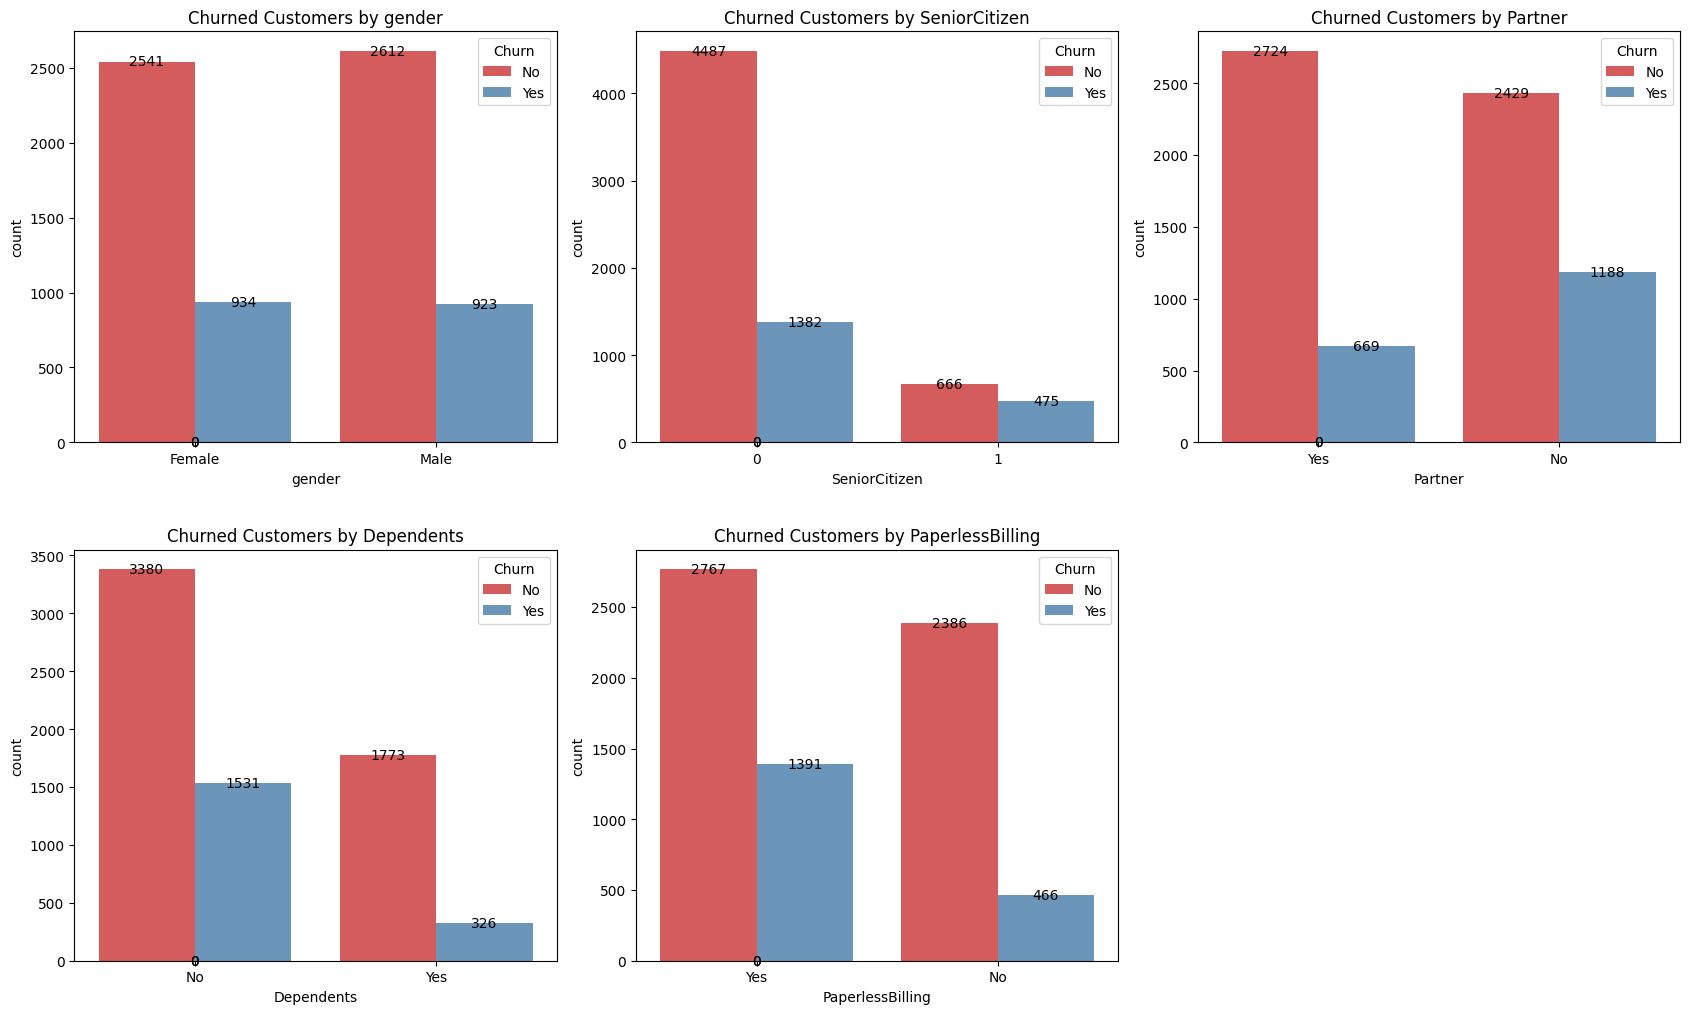

In [ ]:
col_2output=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling'] #draw

plt.figure(figsize=(17,15))
for i,col in enumerate(col_2output,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df ,x = col, hue = 'Churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=3)

In [ ]:
cat_col=df.select_dtypes('object').columns
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

### **Encoding**

In [ ]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [ ]:
def replacement_yes_no(df, columns):

    for col in columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})

columns_to_replace = [
    "Partner", "Dependents", "PhoneService",'MultipleLines', "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "PaperlessBilling", "Churn"
]

replacement_yes_no(df, columns_to_replace)

In [ ]:
df.drop(['tenure_group','tenure X MonthlyCharges','gender'],axis=1,inplace=True)

In [ ]:
categories = [['Month-to-month','One year','Two year']]
oe = OrdinalEncoder(categories = categories)
df['Contract'] = oe.fit_transform(df[['Contract']])
#pkl.dump(oe,open('Contract_oe.pkl','wb'))
df['Contract'].value_counts()

,count
Contract,
0.0,3853
2.0,1685
1.0,1472


In [ ]:
le=LabelEncoder()
for col in ['InternetService','PaymentMethod']:
    df[col]=le.fit_transform(df[col])
     #pkl.dump(le,open(f'{col}_le.pkl','wb'))

In [ ]:
df.Churn.value_counts()

,count
Churn,
0,5153
1,1857


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7010 non-null   int64  
 1   Partner           7010 non-null   int64  
 2   Dependents        7010 non-null   int64  
 3   tenure            7010 non-null   int64  
 4   PhoneService      7010 non-null   int64  
 5   MultipleLines     7010 non-null   int64  
 6   InternetService   7010 non-null   int64  
 7   OnlineSecurity    7010 non-null   int64  
 8   OnlineBackup      7010 non-null   int64  
 9   DeviceProtection  7010 non-null   int64  
 10  TechSupport       7010 non-null   int64  
 11  StreamingTV       7010 non-null   int64  
 12  StreamingMovies   7010 non-null   int64  
 13  Contract          7010 non-null   float64
 14  PaperlessBilling  7010 non-null   int64  
 15  PaymentMethod     7010 non-null   int64  
 16  MonthlyCharges    7010 non-null   float64


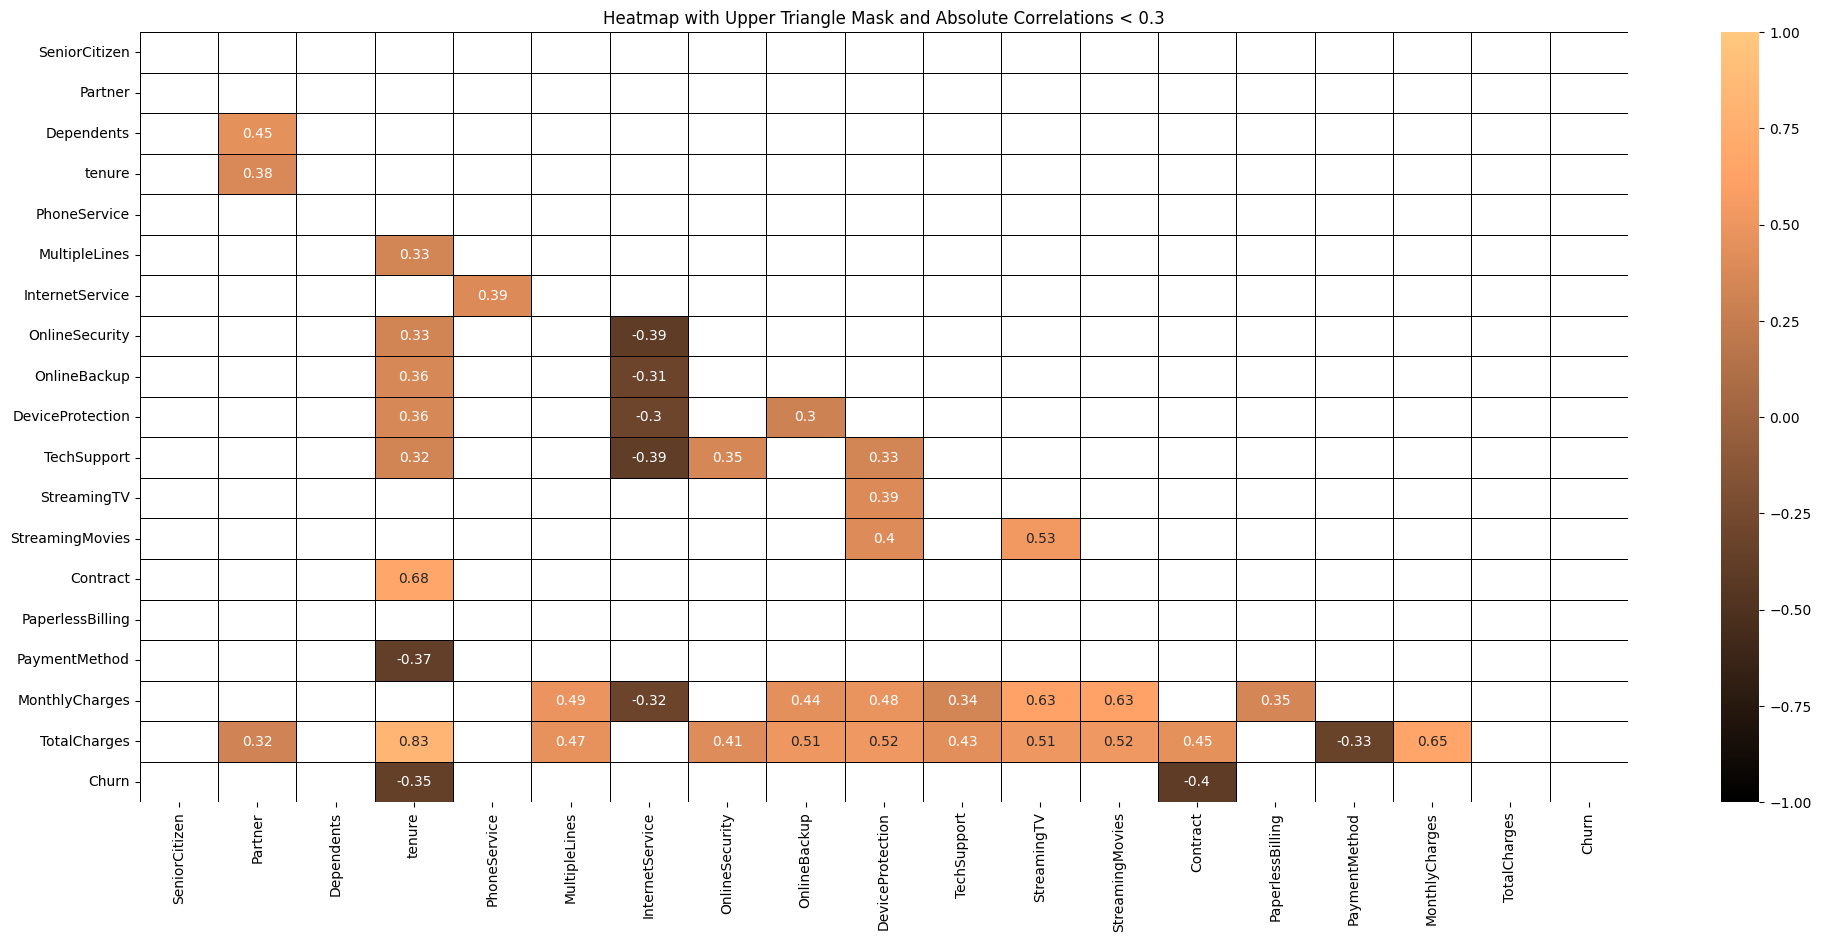

In [ ]:
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Apply a filter to highlight only absolute correlations less than 0.4
filtered_corr = corr.where(corr.abs() > 0.3)

# Set up the matplotlib figure
plt.figure(figsize=(24,10))

# Draw the heatmap with the mask and filtered correlation matrix
sns.heatmap(filtered_corr, mask=mask, annot=True, vmin=-1, vmax=1, cbar=True,linecolor='k',linewidths=.5, cmap='copper')

# Display the plot
plt.title('Heatmap with Upper Triangle Mask and Absolute Correlations < 0.3')
plt.show()

## **Check unbalance**

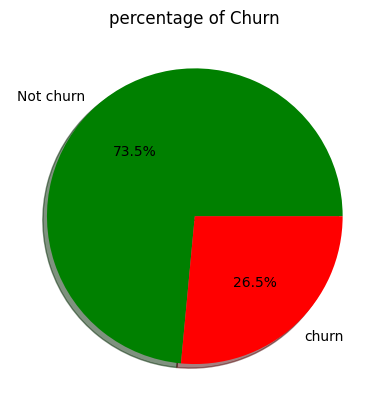

In [ ]:

plt.pie(df.Churn.value_counts(),
        labels=['Not churn','churn'],
        autopct='%1.1f%%',
        colors=['g','r'],
        shadow=True
        )
plt.title('percentage of Churn')
plt.show()

## **Splitting**

In [ ]:
x=df.drop(['Churn'], axis=1)
y=df['Churn']

## **Handle overfitting**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x,y)

print(Counter(y_res))
x_res.shape,  y_res.shape

Counter({0: 5153, 1: 5153})


((10306, 18), (10306,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.14,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [ ]:
Accuracy_models=[]
recall_models=[]
Models_names=[]
f1_score_models=[]
fpr=[]
tpr=[]

In [ ]:
def check_overfitting(model):
    y_train_pred=model.predict(x_train)
    y_val_pred=model.predict(x_val)
    y_test_pred=model.predict(x_test)

    model_name = model.__class__.__name__ # store model name
    print(f'You Applyed [{model_name}] Model')
    print('='*30)

    Train_accuracy = accuracy_score(y_train,y_train_pred)
    Valid_accuracy = accuracy_score(y_val,y_val_pred)
    Test_accuracy = accuracy_score(y_test,y_test_pred)

    print(f"-Train accuracy: {Train_accuracy*100:.2f}%")
    print(f"-Validation accuracy: {Valid_accuracy*100:.2f}%")
    print(f"-Test accuracy: {Test_accuracy*100:.2f}%")
#Evaluation
    f1_score_test=f1_score(y_test,y_test_pred)
    precision_score_test=precision_score(y_test,y_test_pred)
    recall_score_test=recall_score(y_test,y_test_pred)

    print(f'-F1_Score: {f1_score_test*100:.2f}%')
    print(f'-Precision: {precision_score_test*100:.2f}%')
    print(f'-Recall: {recall_score_test*100:.2f}%\n\n')

    plt.figure(figsize=(10,5))
# Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')

# ROC Curve

    plt.subplot(1, 2, 2)

    y_test_prob = model.predict_proba(x_test)[:, 1]
    fp, tp, _ = roc_curve(y_test, y_test_prob)
#
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, color="r")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    plt.tight_layout()
    plt.show()

    y_test_prob = model.predict_proba(x_test)[:, 1]#
    fpr1, tpr1, _ = roc_curve(y_test,y_test_prob)#

    #fpr.append(fpr1)#
    #tpr.append(tpr1)#





    if abs(Valid_accuracy - Train_accuracy)*100 > 5:
        print('='*20)
        print(f'Unfotionatly you have Overfitting more than with Error=: {abs(Valid_accuracy - Train_accuracy)*100:.2f}%\n')
        print('='*20)
    else:
        print('='*20)
        print(f"-Not Overfitting with Test Accuracy : {Test_accuracy*100:.2f}%\n\n")
        print('='*20)

    recall_models.append(recall_score_test)
    Accuracy_models.append(Test_accuracy)
    f1_score_models.append(f1_score_test)
    Models_names.append(model_name)
    fpr.append(fpr1)#
    tpr.append(tpr1)#

## **[1]-Decision tree**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)

params={'criterion':['gini', 'entropy','log_loss'],
        'max_depth':[5, 6, 7, 8 ,9, 10, 11, 12],
        'ccp_alpha':[0.0001,0.001, 0.01, 0.02, 0.03]
        }

grid=GridSearchCV(estimator=decision_tree,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0001, 0.001, 0.01, 0.02, 0.03],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='accuracy')

In [ ]:
finall_decision_tree=grid.best_estimator_
grid.best_params_

{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7}

You Applyed [DecisionTreeClassifier] Model
-Train accuracy: 82.85%
-Validation accuracy: 81.80%
-Test accuracy: 81.77%
-F1_Score: 81.95%
-Precision: 80.78%
-Recall: 83.15%




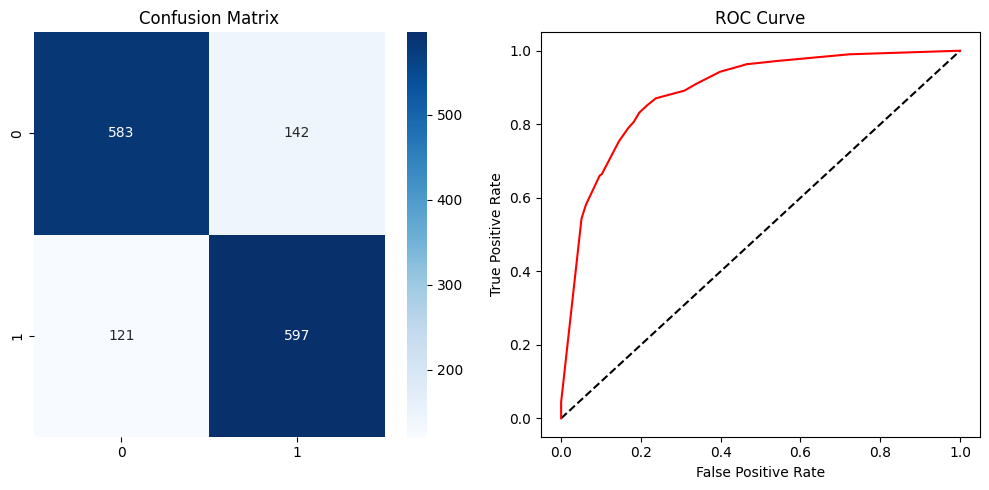

-Not Overfitting with Test Accuracy : 81.77%




In [ ]:
check_overfitting(finall_decision_tree)

## **Scaling**

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_val=sc.transform(x_val)
x_test=sc.transform(x_test)

#pkl.dump(sc,open('scaler.pkl','wb'))

## **[2]-LogisticRegression**

In [ ]:
lr= LogisticRegression()
params={'multi_class':['ovr','auto'],
        'C':[0.1,0.2,0.3,1,5,10],
        'penalty':['l1','l2','l3']
        }

grid=GridSearchCV(estimator=lr,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train,y_train)

 #lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 1, 5, 10],
                         'multi_class': ['ovr', 'auto'],
                         'penalty': ['l1', 'l2', 'l3']},
             scoring='accuracy')

In [ ]:
finall_lr=grid.best_estimator_
grid.best_params_

{'C': 0.2, 'multi_class': 'ovr', 'penalty': 'l2'}

You Applyed [LogisticRegression] Model
-Train accuracy: 80.93%
-Validation accuracy: 81.46%
-Test accuracy: 81.36%
-F1_Score: 81.64%
-Precision: 80.05%
-Recall: 83.29%




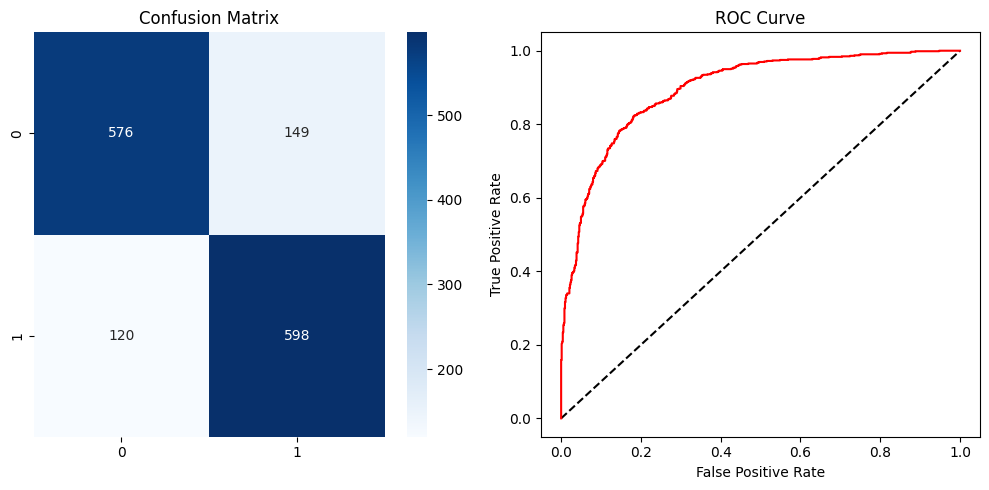

-Not Overfitting with Test Accuracy : 81.36%




In [ ]:
check_overfitting(finall_lr)

## **[3]-SVC**

In [ ]:
svc=SVC(probability=True,random_state=42)
#=============

#params={'C':[0.1,1],
         #'gamma':[1,0.1,0.001],
         #'kernel':['linear','rbf','poly']
        # }

#grid=GridSearchCV(estimator=svc,
                  # param_grid=params,
                  # cv=5,
                  # scoring='accuracy',
                  #n_jobs = -1 )
#grid.fit(x_train,y_train)
#==============
#finall_lr=grid.best_estimator_
#grid.best_params_
svc.fit(x_train,y_train)

SVC(probability=True, random_state=42)

In [ ]:
 #finall_svc=grid.best_estimator_
 #grid.best_params_

You Applyed [SVC] Model
-Train accuracy: 83.67%
-Validation accuracy: 81.76%
-Test accuracy: 81.43%
-F1_Score: 81.21%
-Precision: 81.78%
-Recall: 80.64%




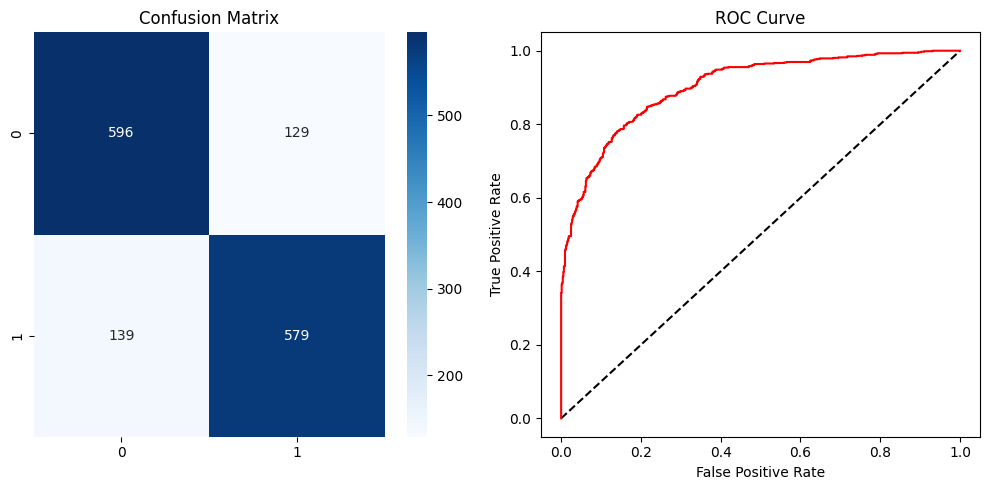

-Not Overfitting with Test Accuracy : 81.43%




In [ ]:
check_overfitting(svc)

### **[4]-Random_forest**

In [ ]:
random_forest=RandomForestClassifier(random_state=42,ccp_alpha=0.001)
#===============
#params={'n_estimators':[50,100,150,200],
#         'max_depth':[4,5,6,7,8,9,10,11],
#         'min_samples_split': [2, 5, 10],
#        'min_samples_leaf': [1, 2, 4],
#         'ccp_alpha':[0.001,0.001, 0.01, 0.02, 0.03]
 #        }

#grid=GridSearchCV(estimator=random_forest,
  #                 param_grid=params,
 #                  cv=5,
  #                 n_jobs=-1,
  #                 scoring='accuracy')
#grid.fit(x_train,y_train)
#===============
random_forest.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.001, random_state=42)

In [ ]:
 #finall_rf=grid.best_estimator_
 #grid.best_params_

You Applyed [RandomForestClassifier] Model
-Train accuracy: 83.90%
-Validation accuracy: 82.63%
-Test accuracy: 82.88%
-F1_Score: 83.28%
-Precision: 81.03%
-Recall: 85.65%




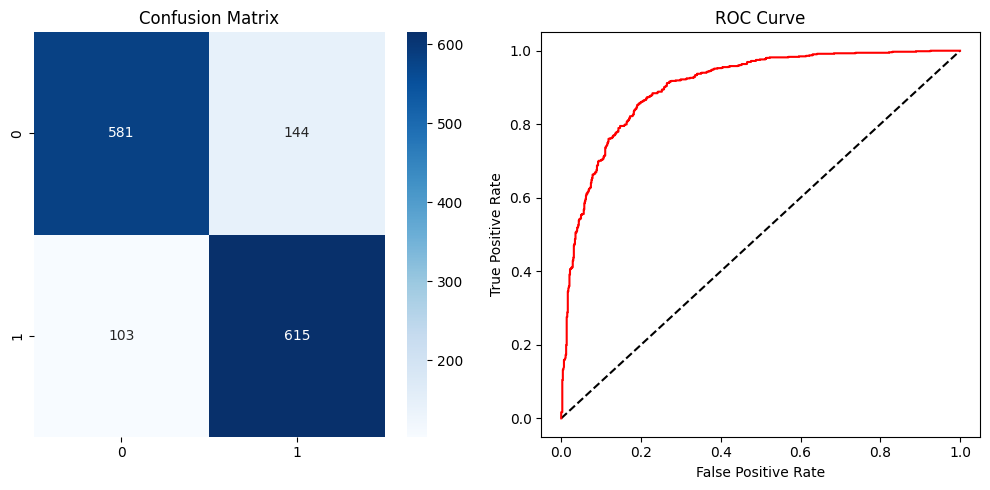

-Not Overfitting with Test Accuracy : 82.88%




In [ ]:
check_overfitting(random_forest)

#[5]-Gradient_boosting

In [ ]:
gradient_boosting=GradientBoostingClassifier(n_estimators=200,
                                            learning_rate=0.001,
                                            max_depth=4,
                                            random_state=42)
gradient_boosting.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=4, n_estimators=200,
                           random_state=42)

You Applyed [GradientBoostingClassifier] Model
-Train accuracy: 81.61%
-Validation accuracy: 80.93%
-Test accuracy: 81.50%
-F1_Score: 82.00%
-Precision: 79.48%
-Recall: 84.68%




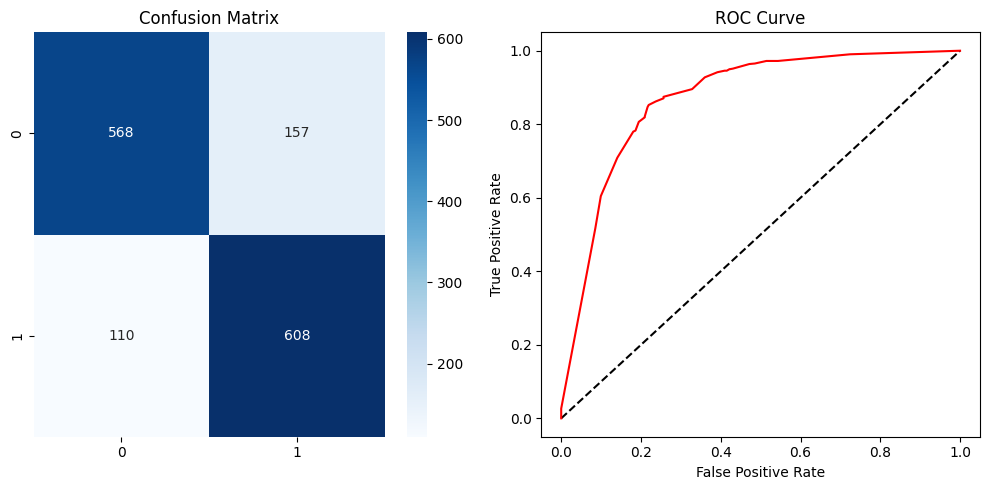

-Not Overfitting with Test Accuracy : 81.50%




In [ ]:
check_overfitting(gradient_boosting)

#[6]-xgboost

In [ ]:
xgboost=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss',
                      n_estimators=115,
                      max_depth=4,
                      learning_rate=0.2,
                      subsample=1.0,
                      colsample_bytree=1.0)

xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=115,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

You Applyed [XGBClassifier] Model
-Train accuracy: 89.20%
-Validation accuracy: 84.28%
-Test accuracy: 83.99%
-F1_Score: 84.06%
-Precision: 83.31%
-Recall: 84.82%




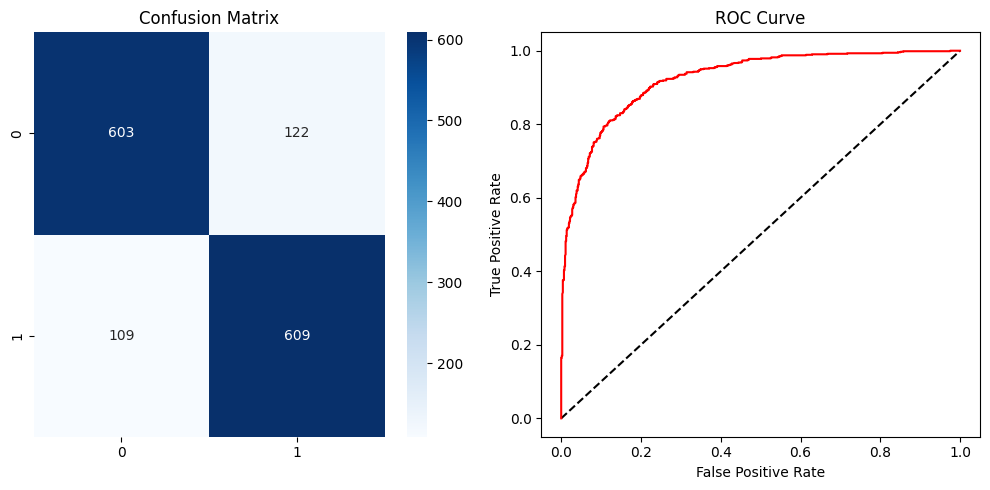

-Not Overfitting with Test Accuracy : 83.99%




In [ ]:
check_overfitting(xgboost)

#[7]-AdaBoost

In [ ]:
adaboost=AdaBoostClassifier(random_state=42,n_estimators=200,learning_rate=1.0,algorithm='SAMME.R')


adaboost.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

You Applyed [AdaBoostClassifier] Model
-Train accuracy: 83.85%
-Validation accuracy: 83.64%
-Test accuracy: 83.65%
-F1_Score: 84.18%
-Precision: 81.14%
-Recall: 87.47%




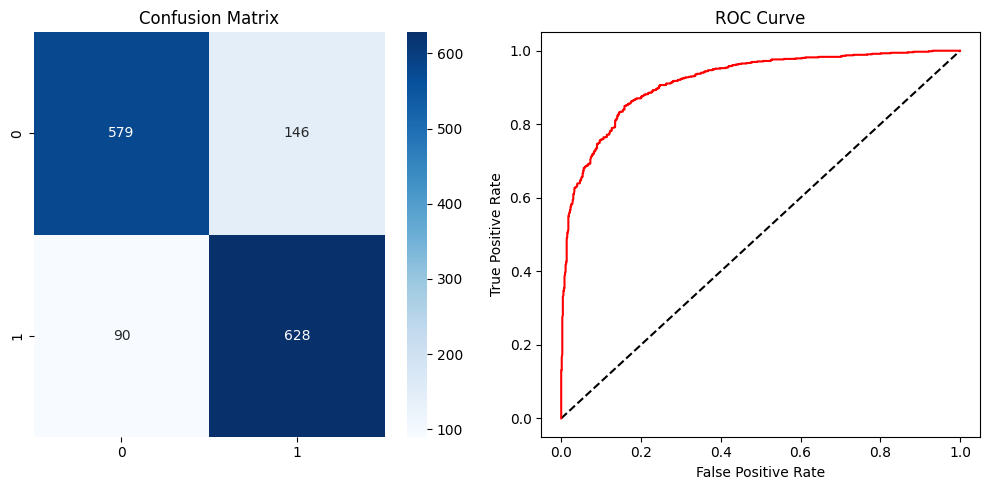

-Not Overfitting with Test Accuracy : 83.65%




In [ ]:
check_overfitting(adaboost)

#[8]-Stacking

In [ ]:
from re import X
base_models = [('rf',RandomForestClassifier(max_depth= 4, n_estimators= 40)),
               ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=4, random_state=42))]

meta_model = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.01, random_state=42)
stacking = StackingClassifier(estimators=base_models,
                              final_estimator=meta_model
                              )
stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=4,
                                                       n_estimators=40)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           max_depth=4,
                                                           n_estimators=200,
                                                           random_state=42))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_s...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.01,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=2, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...))

You Applyed [StackingClassifier] Model
-Train accuracy: 83.61%
-Validation accuracy: 82.89%
-Test accuracy: 83.58%
-F1_Score: 84.00%
-Precision: 81.52%
-Recall: 86.63%




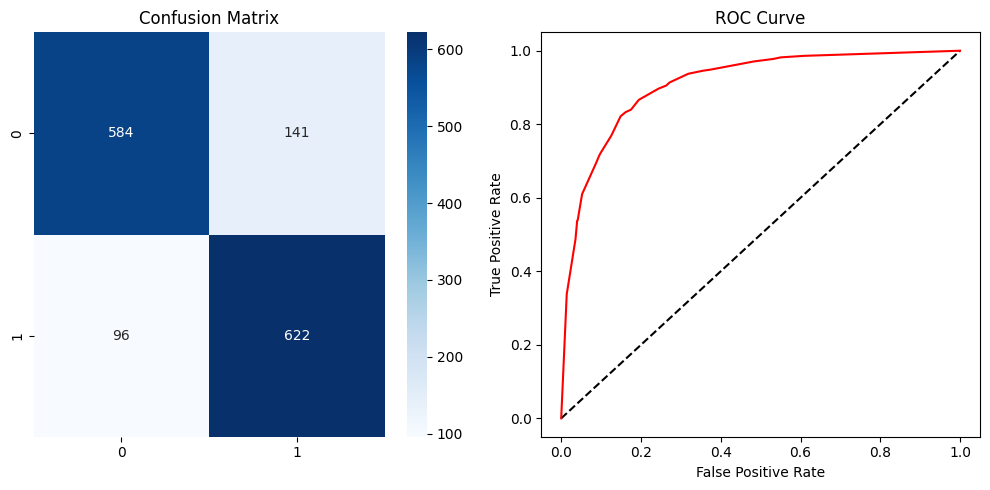

-Not Overfitting with Test Accuracy : 83.58%




In [ ]:
check_overfitting(stacking)

#[9]-Gaussian NB

In [ ]:
GNB=GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid=GridSearchCV(estimator=GNB,
                  param_grid=param_grid,
                  cv=5,
                  scoring='recall')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='recall')

In [ ]:
Nave_Modle=grid.best_estimator_
grid.best_params_

{'var_smoothing': 1e-09}

You Applyed [GaussianNB] Model
-Train accuracy: 76.95%
-Validation accuracy: 77.40%
-Test accuracy: 79.63%
-F1_Score: 80.37%
-Precision: 77.18%
-Recall: 83.84%




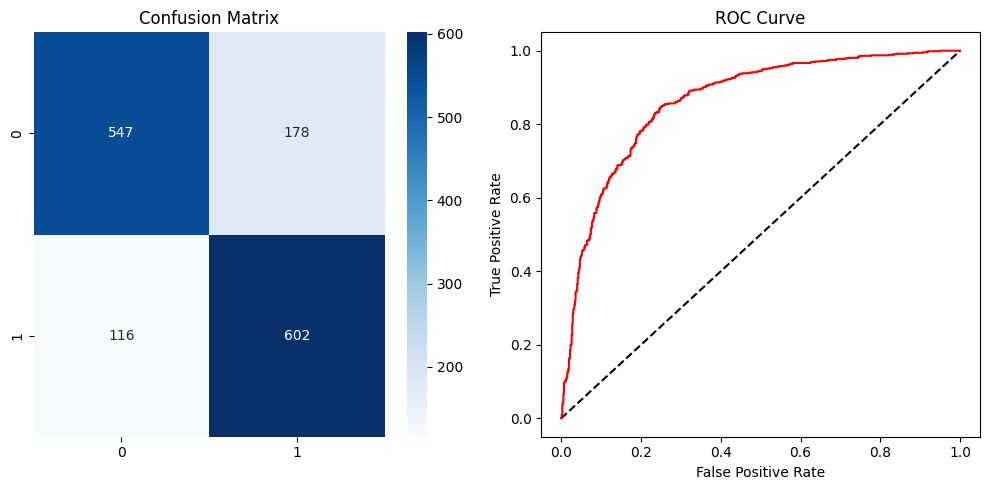

-Not Overfitting with Test Accuracy : 79.63%




In [ ]:
check_overfitting(Nave_Modle)

#[10]-KNN

In [ ]:
knn=KNeighborsClassifier(algorithm='auto',weights='uniform',p=1,n_neighbors=13)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13, p=1)

You Applyed [KNeighborsClassifier] Model
-Train accuracy: 82.22%
-Validation accuracy: 80.18%
-Test accuracy: 81.77%
-F1_Score: 83.02%
-Precision: 77.38%
-Recall: 89.55%




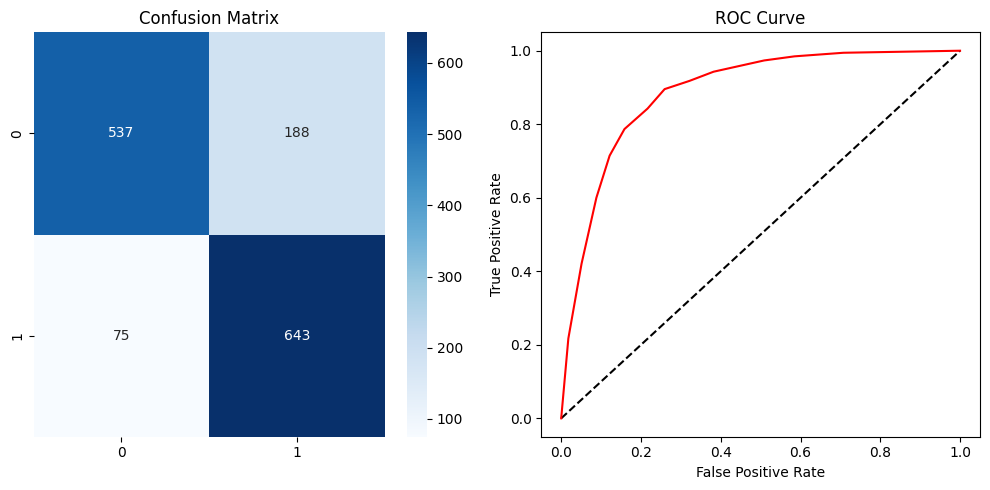

-Not Overfitting with Test Accuracy : 81.77%




In [ ]:
check_overfitting(knn)

In [ ]:
print(f1_score_models)

[0.8194921070693205, 0.816382252559727, 0.8120617110799438, 0.8327691266079892, 0.8199595414699933, 0.8405797101449275, 0.8418230563002681, 0.8399729912221472, 0.8037383177570093, 0.8302130406714009]


#**Accuracy Comparison**

In [ ]:
model_accuracy=pd.DataFrame({'Model':Models_names[:10],'Accuracy':Accuracy_models[:10],'Recall':recall_models[:10],'F1_Score':f1_score_models[:10],'fpr':fpr[:10],'tpr':tpr[:10]}).sort_values(by='Accuracy',ascending=False)
model_accuracy

,Model,Accuracy,Recall,F1_Score,fpr,tpr
5,XGBClassifier,0.839917,0.848189,0.840580,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.001392757660167131, 0.0501392757660167..."
6,AdaBoostClassifier,0.836452,0.874652,0.841823,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.001392757660167131, 0.0334261838440111..."
7,StackingClassifier,0.835759,0.866295,0.839973,"[0.0, 0.013793103448275862, 0.0137931034482758...","[0.0, 0.33565459610027853, 0.3370473537604457,..."
3,RandomForestClassifier,0.828829,0.856546,0.832769,"[0.0, 0.0, 0.0, 0.002758620689655172, 0.002758...","[0.0, 0.001392757660167131, 0.0167130919220055..."
0,DecisionTreeClassifier,0.817741,0.831476,0.819492,"[0.0, 0.0, 0.05103448275862069, 0.062068965517...","[0.0, 0.04456824512534819, 0.5431754874651811,..."
9,KNeighborsClassifier,0.817741,0.895543,0.830213,"[0.0, 0.01793103448275862, 0.05103448275862069...","[0.0, 0.21727019498607242, 0.4206128133704735,..."
4,GradientBoostingClassifier,0.814969,0.846797,0.819960,"[0.0, 0.0, 0.0, 0.08551724137931034, 0.0993103...","[0.0, 0.016713091922005572, 0.0264623955431754..."
2,SVC,0.814276,0.806407,0.812062,"[0.0, 0.0, 0.0, 0.001379310344827586, 0.001379...","[0.0, 0.001392757660167131, 0.3412256267409471..."
1,LogisticRegression,0.813583,0.832869,0.816382,"[0.0, 0.0, 0.0, 0.001379310344827586, 0.001379...","[0.0, 0.001392757660167131, 0.1587743732590529..."
8,GaussianNB,0.796258,0.838440,0.803738,"[0.0, 0.001379310344827586, 0.0013793103448275...","[0.0, 0.0, 0.009749303621169917, 0.00974930362..."


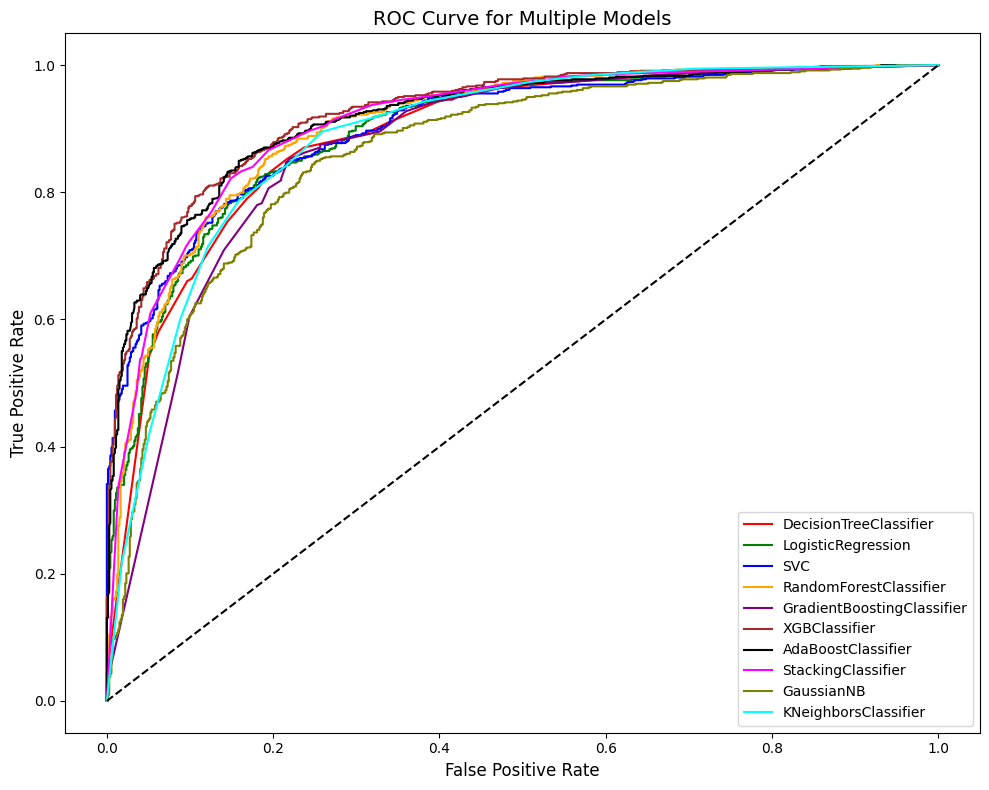

In [ ]:
colors = ['red','green','blue','orange','purple','brown','black','magenta','olive','cyan','yellow']

plt.figure(figsize=(10,8))



for fp, tp, color, name in zip(fpr, tpr, colors, Models_names):
    plt.plot(fp, tp ,color=color, label=name)

plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Multiple Models', fontsize=14)


plt.legend(loc='lower right')


plt.tight_layout()
plt.show()

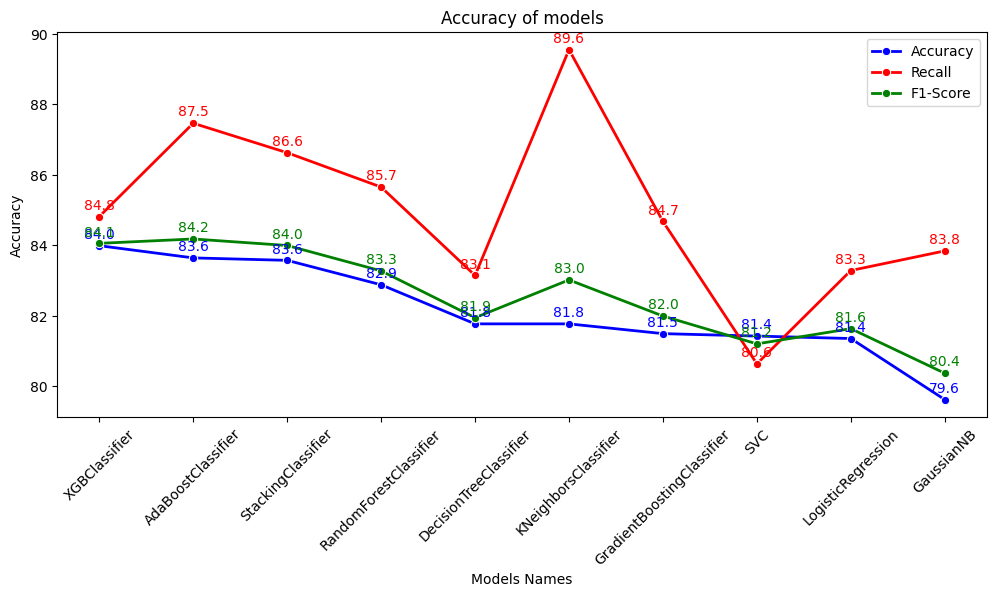

In [ ]:
plt.figure(figsize=(12,5))
#sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Accuracy']*100,marker='o',color='b',lw=2,label='Accuracy')
#sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Recall']*100,marker='o',color='r',lw=2,label='Recall')
#sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['F1_Score']*100,marker='o',color='g',lw=2,label='F1-Score')
sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Accuracy']*100,marker='o',color='b',lw=2,label='Accuracy')
for i, score in enumerate(model_accuracy['Accuracy']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='b')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Recall']*100,marker='o',color='r',lw=2,label='Recall')
for i, score in enumerate(model_accuracy['Recall']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='r')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['F1_Score']*100,marker='o',color='g',lw=2,label='F1-Score')
for i, score in enumerate(model_accuracy['F1_Score']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='g')
#---------------------------------------------------------------

plt.legend()
plt.xticks(rotation=45)

plt.xlabel('Models Names')
plt.ylabel('Accuracy')
plt.title('Accuracy of models')
plt.show()

In [ ]:
best_accuracy=model_accuracy.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
best_recall=model_accuracy.sort_values(by='Recall',ascending=False).reset_index(drop=True)
best_f1_score=model_accuracy.sort_values(by='F1_Score',ascending=False).reset_index(drop=True)

In [ ]:
print(f'Best Accuracy Model: {best_accuracy.Model[0]} With accuracy: {best_accuracy.Accuracy[0]*100:0.2f}%')
print(f'Best Recall Model: {best_recall.Model[0]} With Recall: {best_recall.Recall[0]*100:0.2f}%')
print(f'Best F1_Score Model: {best_f1_score.Model[0]} With F1_Score: {best_f1_score.F1_Score[0]*100:0.2f}%')

Best Accuracy Model: XGBClassifier With accuracy: 83.99%
Best Recall Model: KNeighborsClassifier With Recall: 89.55%
Best F1_Score Model: AdaBoostClassifier With F1_Score: 84.18%


In [ ]:
models=[finall_decision_tree, finall_lr, svc, random_forest, gradient_boosting, xgboost, adaboost, stacking, Nave_Modle,knn]
names=Models_names
for model,name in zip(models,names):
   # pkl.dump(model,open(f'{name}.pkl','wb'))

SyntaxError: incomplete input (<ipython-input-85-b83fa04986a7>, line 4)